In [1]:
# importing csv module
import csv
  
# csv file name
filename = "TestData.csv"
  
# initializing the titles and rows list
fields = []
rows = []
  
# reading csv file
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
      
    # extracting field names through first row
    fields = next(csvreader)
  
    # extracting each data row one by one
    for row in csvreader:
        rows.append(row)

In [2]:
#Extracting CSV Headers
NewFields = [i.split('\t') for i in fields][0]
NewFields

['Indel',
 'Chr-Pos',
 'MultiSampleCount',
 'MultiAlleleCount',
 'NearbyIndelCount25bp',
 'RecurrentIndel']

In [3]:
#Creating Rows for pandas DataFrame
NewRows = []
for row in rows:
    for i in row:
        NewRows.append(i.split('\t'))

In [12]:
#Load CSV data in as DataFrame
import pandas as pd
df = pd.DataFrame(NewRows,columns = NewFields)
df

,Indel,Chr-Pos,MultiSampleCount,MultiAlleleCount,NearbyIndelCount25bp,RecurrentIndel
0,1-100000989-A-ATC,1-100000989,11,1,1,TRUE
1,1-100001151-GT-G,1-100001151,1,1,2,TRUE
2,1-100001168-TG-T,1-100001168,1,1,2,TRUE
3,1-100001497-TA-T,1-100001497,1,1,1,FALSE
4,1-100001671-C-CTT,1-100001671,5,4,1,TRUE
...,...,...,...,...,...,...
15022039,Y-9992125-AT-A,Y-9992125,3,1,1,TRUE
15022040,Y-9992151-TA-T,Y-9992151,6,1,2,TRUE
15022041,Y-9992174-AC-A,Y-9992174,7,1,2,TRUE
15022042,Y-9994833-TAATG-T,Y-9994833,2,1,1,TRUE


In [13]:
MultiSample,MultiAllele,NearbyIndel = df['MultiSampleCount'].tolist(),df['MultiAlleleCount'].tolist(),df['NearbyIndelCount25bp'].tolist()
for i in range(0,len(MultiSample)):
    try:
        MultiSample[i] = int(MultiSample[i])
        MultiAllele[i] = int(MultiAllele[i])
        NearbyIndel[i] = int(NearbyIndel[i])
    except:
        ValueError

df['MultiSampleCount'] = MultiSample
df['MultiAlleleCount'] = MultiAllele
df['NearbyIndelCount25bp'] = NearbyIndel

In [18]:
filtered_df_4, filtered_df_5, filtered_df_6 = df[(df["MultiSampleCount"] >= 4) | (df["MultiAlleleCount"] >= 4) | (df["NearbyIndelCount25bp"] >= 4)], df[(df["MultiSampleCount"] >= 5) | (df["MultiAlleleCount"] >= 5) | (df["NearbyIndelCount25bp"] >= 5)], df[(df["MultiSampleCount"] >= 6) | (df["MultiAlleleCount"] >= 6) | (df["NearbyIndelCount25bp"] >= 6)]


In [73]:
ChromList_4,ChromList_5,ChromList_6 = filtered_df_4['Chr-Pos'].tolist(),filtered_df_5['Chr-Pos'].tolist(),filtered_df_6['Chr-Pos'].tolist()

In [74]:
Chrom_Dict_4, Chrom_Dict_5, Chrom_Dict_6 = {},{},{}

for i in range(0,len(ChromList_4)):
    Chromosome4,Pos4 = ChromList_4[i].split('-')
    if Chromosome4 not in Chrom_Dict_4:
        Chrom_Dict_4[Chromosome4] = [int(Pos4)]
    else:
        Chrom_Dict_4[Chromosome4].append(int(Pos4))
    
for i in range(0,len(ChromList_5)):
    Chromosome5,Pos5 = ChromList_5[i].split('-')
    if Chromosome5 not in Chrom_Dict_5:
        Chrom_Dict_5[Chromosome5] = [int(Pos5)]
    else:
        Chrom_Dict_5[Chromosome5].append(int(Pos5))
        
for i in range(0,len(ChromList_6)):
    Chromosome6,Pos6 = ChromList_6[i].split('-')
    if Chromosome6 not in Chrom_Dict_6:
        Chrom_Dict_6[Chromosome6] = [int(Pos6)]
    else:
        Chrom_Dict_6[Chromosome6].append(int(Pos6))
    

In [75]:
for key4, value4 in Chrom_Dict_4.items():
    vals = sorted(value4)
    Chrom_Dict_4[key4] = vals
    
for key5, value5 in Chrom_Dict_5.items():
    vals = sorted(value5)
    Chrom_Dict_5[key5] = vals

for key6, value6 in Chrom_Dict_6.items():
    vals = sorted(value6)
    Chrom_Dict_6[key6] = vals

In [76]:
import numpy as np
ChromPosDifference_4, ChromPosDifference_5, ChromPosDifference_6 = {}, {}, {}

for key4,value4 in Chrom_Dict_4.items():
    val =  abs(np.diff(value4))
    ChromPosDifference_4[key4] = val.tolist()
    
for key5,value5 in Chrom_Dict_5.items():
    val =  abs(np.diff(value5))
    ChromPosDifference_5[key5] = val.tolist()
    
for key6,value6 in Chrom_Dict_6.items():
    val =  abs(np.diff(value6))
    ChromPosDifference_6[key6] = val.tolist()


In [88]:
CounterList4,CounterList5,CounterList6, = [],[],[]

for key4, value4 in ChromPosDifference_4.items():
    counter_dict4 = {}
    for i4 in value4:
        if i4 in counter_dict4:
            counter_dict4[i4] += 1
        else:
            counter_dict4[i4] = 1
    CounterList4.append(counter_dict4)
    
for key5, value5 in ChromPosDifference_5.items():
    counter_dict5 = {}
    for i5 in value5:
        if i5 in counter_dict5:
            counter_dict5[i5] += 1
        else:
            counter_dict5[i5] = 1
    CounterList5.append(counter_dict5)
    
for key6, value6 in ChromPosDifference_6.items():
    counter_dict6 = {}
    for i6 in value6:
        if i6 in counter_dict6:
            counter_dict6[i6] += 1
        else:
            counter_dict6[i6] = 1
    CounterList6.append(counter_dict6)

In [360]:
Chromosomes4,Chromosomes5,Chromosomes6 = list(Chrom_Dict_4.keys()), list(Chrom_Dict_5.keys()), list(Chrom_Dict_6.keys())
PositionCounter4,PositionCounter5,PositionCounter6 = dict(zip(Chromosomes4, CounterList4)),dict(zip(Chromosomes5, CounterList5)),dict(zip(Chromosomes6, CounterList6))


In [361]:
for key4, value4 in PositionCounter4.items():
    newval = dict(sorted(PositionCounter4[key4].items(), key=lambda item: item[0]))
    PositionCounter4[key4] = newval
    
for key5, value5 in PositionCounter4.items():
    newval = dict(sorted(PositionCounter5[key5].items(), key=lambda item: item[0]))
    PositionCounter5[key5] = newval
    
for key6, value6 in PositionCounter6.items():
    newval = dict(sorted(PositionCounter6[key6].items(), key=lambda item: item[0]))
    PositionCounter6[key6] = newval

In [362]:
X4 = PositionCounter4['X']
Y4 = PositionCounter4['Y']
X5 = PositionCounter5['X']
Y5 = PositionCounter5['Y']
X6 = PositionCounter6['X']
Y6 = PositionCounter6['Y']

In [363]:
PositionCounter6

{'1': {0: 157070,
  1: 21802,
  2: 16067,
  3: 7357,
  4: 6789,
  5: 3733,
  6: 3345,
  7: 2338,
  8: 2371,
  9: 1815,
  10: 1770,
  11: 1356,
  12: 1366,
  13: 1007,
  14: 989,
  15: 863,
  16: 817,
  17: 616,
  18: 617,
  19: 498,
  20: 486,
  21: 400,
  22: 349,
  23: 340,
  24: 308,
  25: 249,
  26: 198,
  27: 192,
  28: 184,
  29: 192,
  30: 198,
  31: 159,
  32: 179,
  33: 146,
  34: 163,
  35: 164,
  36: 157,
  37: 163,
  38: 144,
  39: 149,
  40: 140,
  41: 131,
  42: 145,
  43: 139,
  44: 146,
  45: 147,
  46: 130,
  47: 122,
  48: 114,
  49: 122,
  50: 99,
  51: 127,
  52: 121,
  53: 112,
  54: 125,
  55: 119,
  56: 119,
  57: 128,
  58: 113,
  59: 124,
  60: 131,
  61: 96,
  62: 116,
  63: 116,
  64: 110,
  65: 108,
  66: 99,
  67: 87,
  68: 100,
  69: 111,
  70: 94,
  71: 89,
  72: 102,
  73: 106,
  74: 105,
  75: 101,
  76: 93,
  77: 92,
  78: 103,
  79: 88,
  80: 96,
  81: 88,
  82: 93,
  83: 89,
  84: 106,
  85: 82,
  86: 96,
  87: 82,
  88: 107,
  89: 82,
  90: 80,
  91

In [364]:
for key, value in PositionCounter4.items():
    print(key,type(key))

1 <class 'str'>
10 <class 'str'>
11 <class 'str'>
12 <class 'str'>
13 <class 'str'>
14 <class 'str'>
15 <class 'str'>
16 <class 'str'>
17 <class 'str'>
18 <class 'str'>
19 <class 'str'>
2 <class 'str'>
20 <class 'str'>
21 <class 'str'>
22 <class 'str'>
3 <class 'str'>
4 <class 'str'>
5 <class 'str'>
6 <class 'str'>
7 <class 'str'>
8 <class 'str'>
9 <class 'str'>
X <class 'str'>
Y <class 'str'>


In [365]:
del(PositionCounter4['X'])
del(PositionCounter4['Y'])
del(PositionCounter5['X'])
del(PositionCounter5['Y'])
del(PositionCounter6['X'])
del(PositionCounter6['Y'])

In [366]:
PositionCounter4 = {int(key4):value4 for key4,value4 in sorted(PositionCounter4.items())}
PositionCounter5 = {int(key5):value5 for key5,value5 in sorted(PositionCounter5.items())}
PositionCounter6 = {int(key6):value6 for key6,value6 in sorted(PositionCounter6.items())}

In [368]:
for key, val in PositionCounter6.items():
    print(key,type(key))

1 <class 'int'>
10 <class 'int'>
11 <class 'int'>
12 <class 'int'>
13 <class 'int'>
14 <class 'int'>
15 <class 'int'>
16 <class 'int'>
17 <class 'int'>
18 <class 'int'>
19 <class 'int'>
2 <class 'int'>
20 <class 'int'>
21 <class 'int'>
22 <class 'int'>
3 <class 'int'>
4 <class 'int'>
5 <class 'int'>
6 <class 'int'>
7 <class 'int'>
8 <class 'int'>
9 <class 'int'>


In [369]:
PosCount4,PosCount5,PosCount6 = {},{},{}
for key4, value4 in sorted(PositionCounter4.items()):
    PosCount4[key4] = value4
    
for key5, value5 in sorted(PositionCounter5.items()):
    PosCount5[key5] = value5
    
for key6, value6 in sorted(PositionCounter6.items()):
    PosCount6[key6] = value6
    

In [371]:
for key, value in PosCount4.items():
    print(key,type(key))

1 <class 'int'>
2 <class 'int'>
3 <class 'int'>
4 <class 'int'>
5 <class 'int'>
6 <class 'int'>
7 <class 'int'>
8 <class 'int'>
9 <class 'int'>
10 <class 'int'>
11 <class 'int'>
12 <class 'int'>
13 <class 'int'>
14 <class 'int'>
15 <class 'int'>
16 <class 'int'>
17 <class 'int'>
18 <class 'int'>
19 <class 'int'>
20 <class 'int'>
21 <class 'int'>
22 <class 'int'>


In [372]:
PositionCounter4[1] is PosCount4[1]

True

In [373]:
PositionCounter5[1] is PosCount5[1]

True

In [374]:
PositionCounter6[1] is PosCount6[1]

True

In [376]:
PosCount4['X'] = X4
PosCount4['Y'] = Y4
PosCount5['X'] = X5
PosCount5['Y'] = Y5
PosCount6['X'] = X6
PosCount6['Y'] = Y6


In [379]:
for key, value in PosCount6.items():
    print(key,type(key))

1 <class 'int'>
2 <class 'int'>
3 <class 'int'>
4 <class 'int'>
5 <class 'int'>
6 <class 'int'>
7 <class 'int'>
8 <class 'int'>
9 <class 'int'>
10 <class 'int'>
11 <class 'int'>
12 <class 'int'>
13 <class 'int'>
14 <class 'int'>
15 <class 'int'>
16 <class 'int'>
17 <class 'int'>
18 <class 'int'>
19 <class 'int'>
20 <class 'int'>
21 <class 'int'>
22 <class 'int'>
X <class 'str'>
Y <class 'str'>


In [380]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

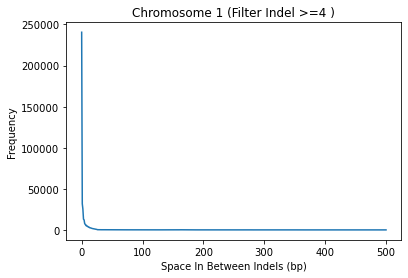

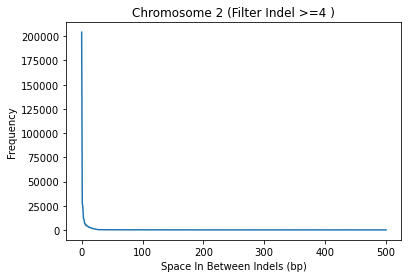

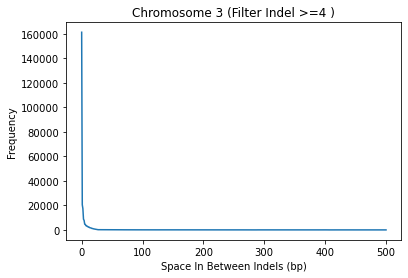

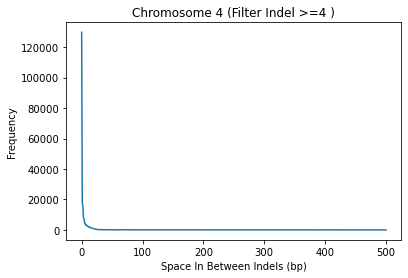

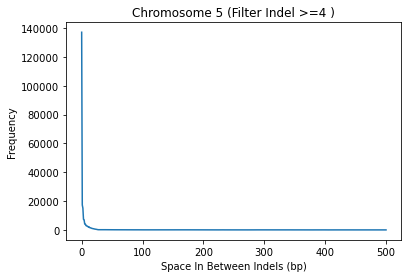

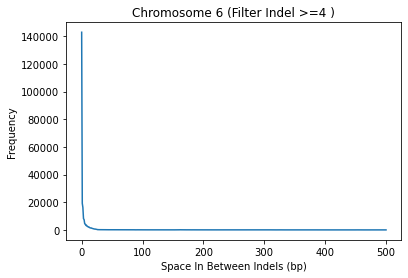

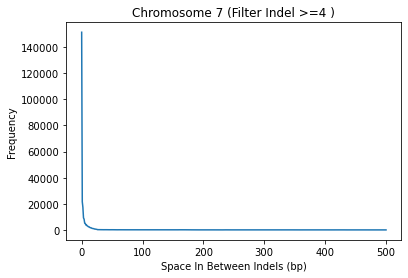

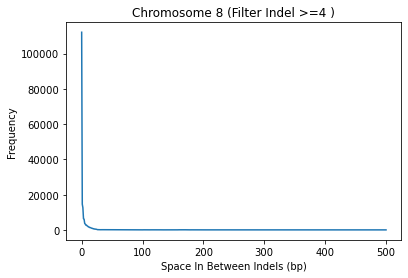

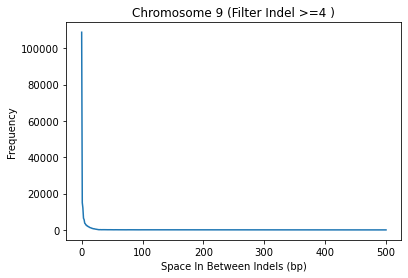

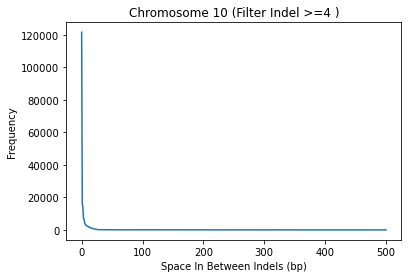

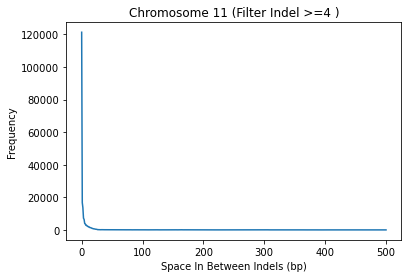

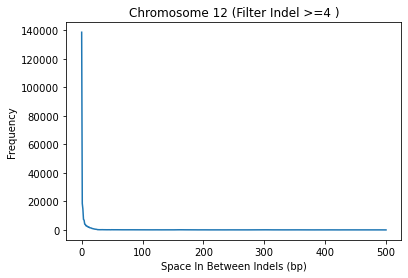

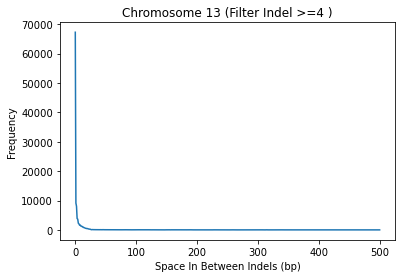

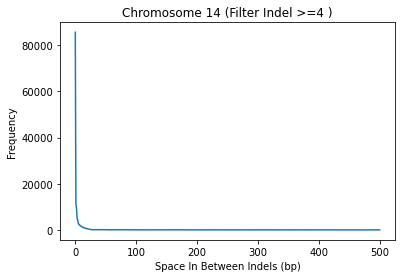

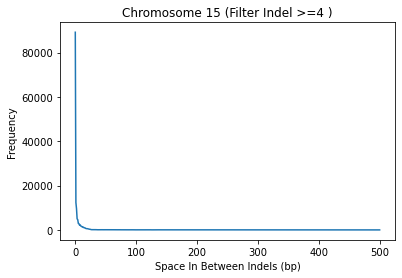

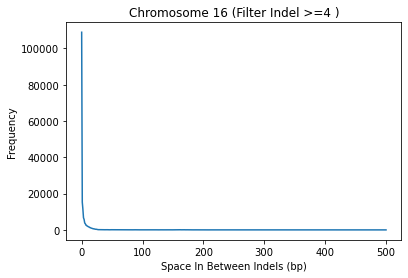

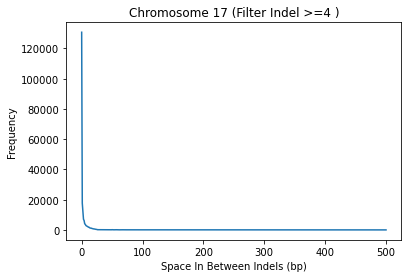

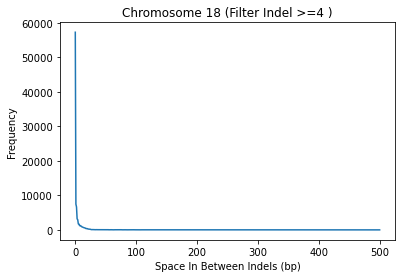

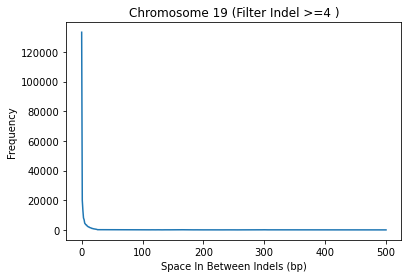

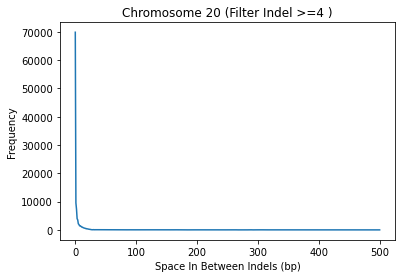

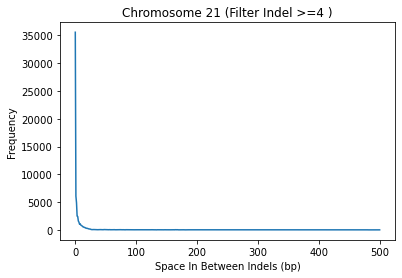

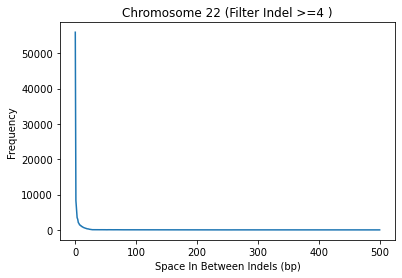

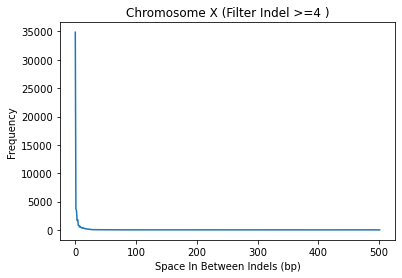

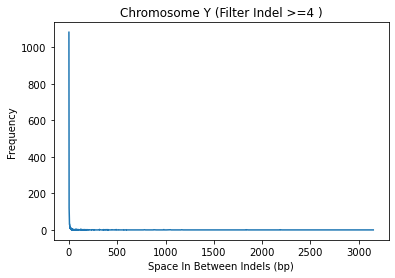

In [386]:
for i in range(0,len(Chromosomes4)):
    vals = list(PosCount4.values())
    n_items = take(501, vals[i].items())
    x, y = zip(*n_items) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    plt.title('Chromosome %s (Filter Indel >=4 )'%(Chromosomes[i]))
    plt.xlabel('Space In Between Indels (bp)')
    plt.ylabel('Frequency')
    plt.savefig("4 Filter Chromosome{C}.png".format(C=Chromosomes[i]))
    plt.show()
    

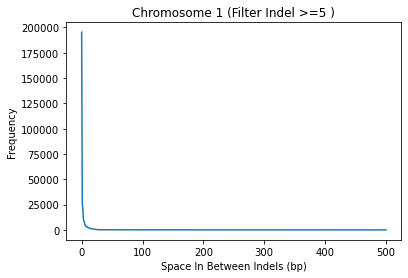

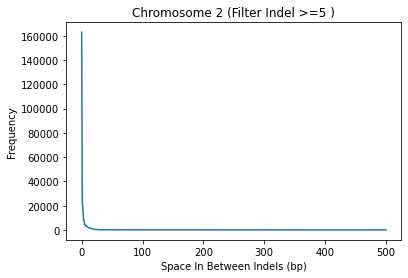

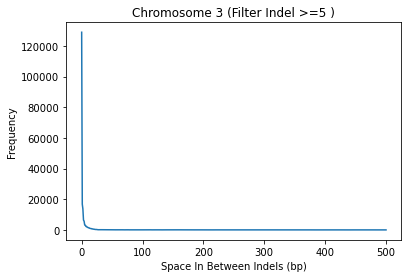

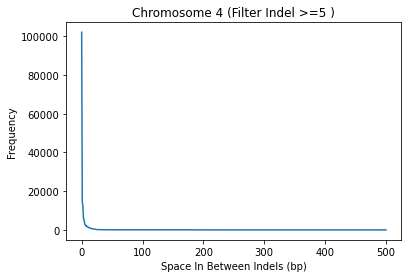

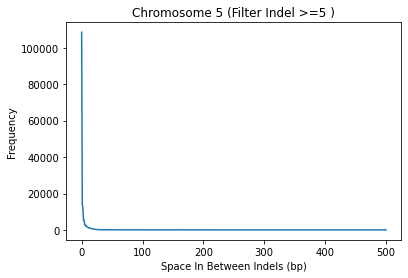

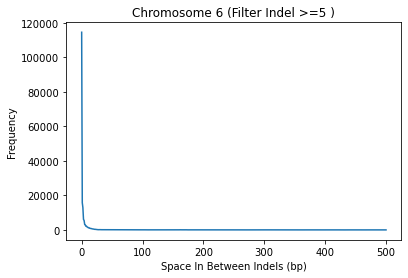

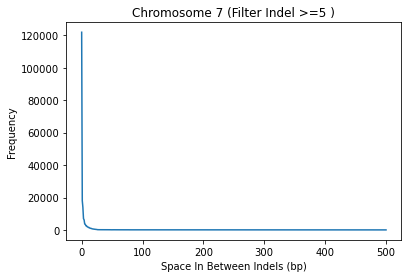

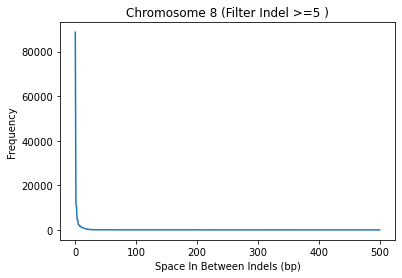

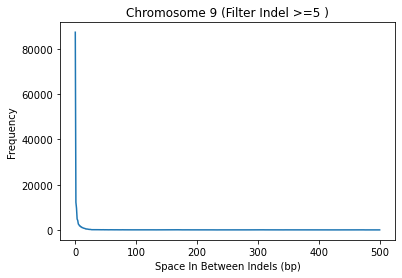

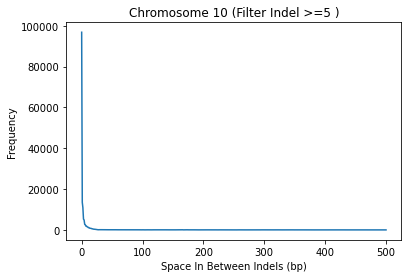

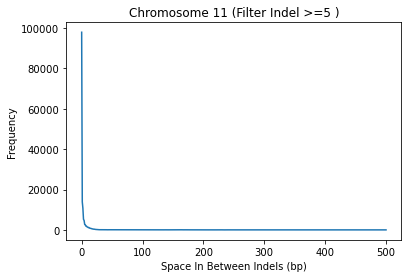

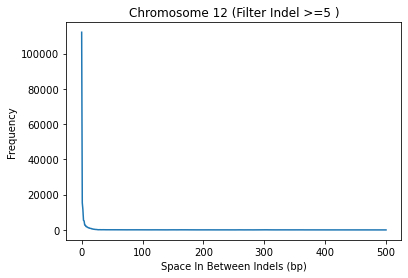

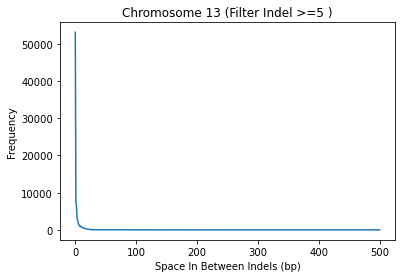

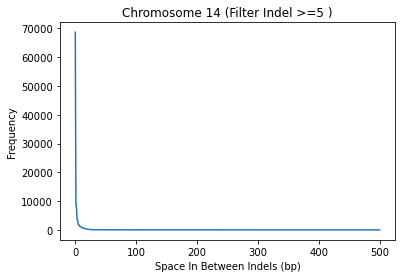

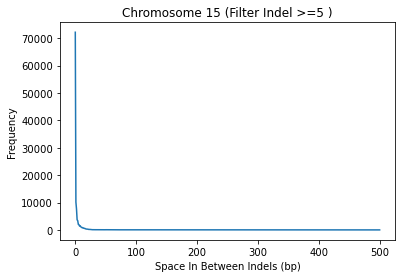

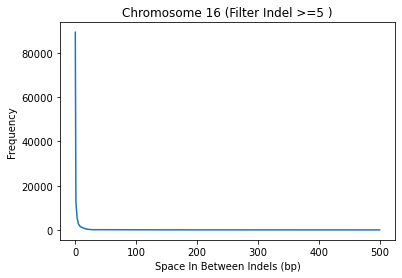

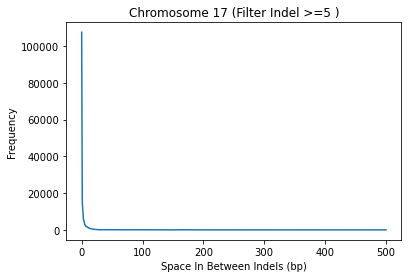

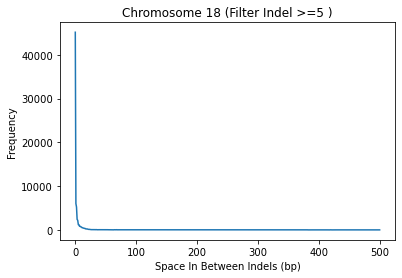

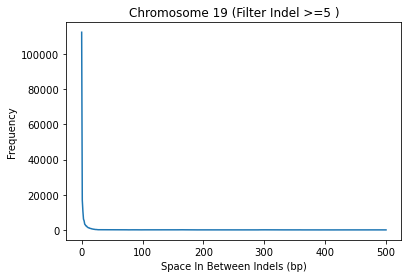

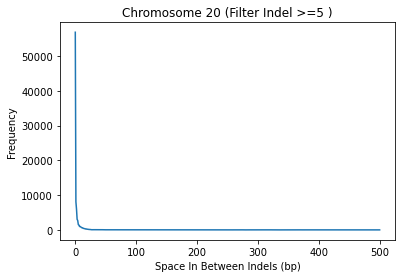

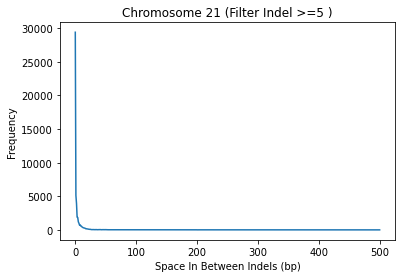

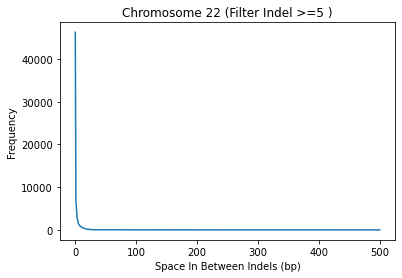

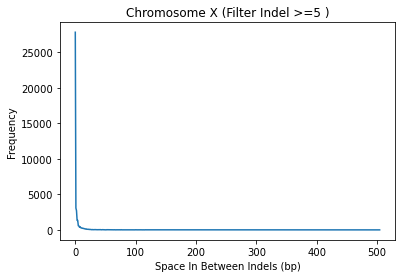

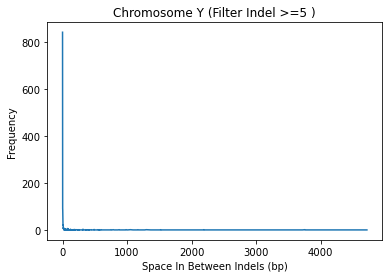

In [388]:
for i in range(0,len(Chromosomes5)):
    vals = list(PosCount5.values())
    n_items = take(501, vals[i].items())
    x, y = zip(*n_items) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    plt.title('Chromosome %s (Filter Indel >=5 )'%(Chromosomes[i]))
    plt.xlabel('Space In Between Indels (bp)')
    plt.ylabel('Frequency')
    plt.savefig("5 Filter Chromosome{C}.png".format(C=Chromosomes[i]))
    plt.show()
    

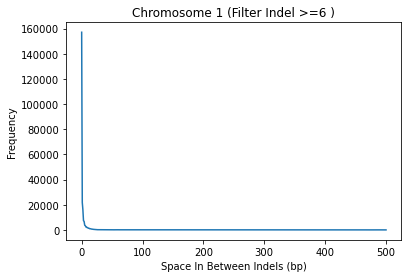

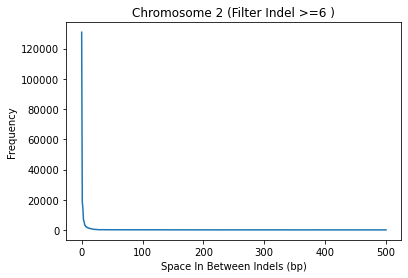

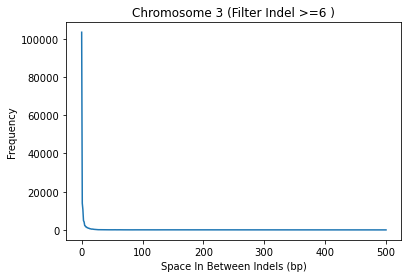

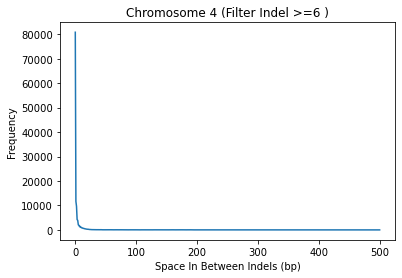

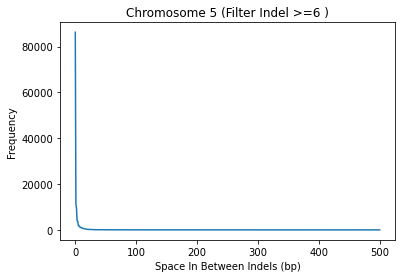

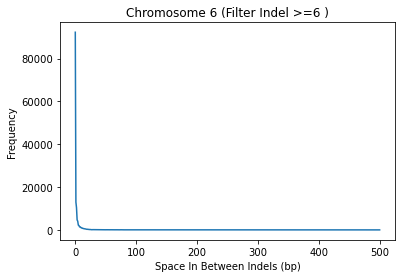

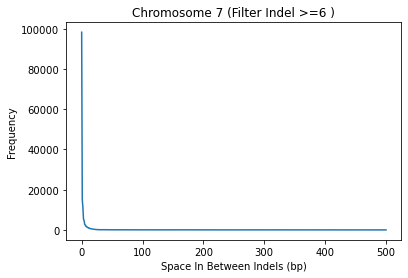

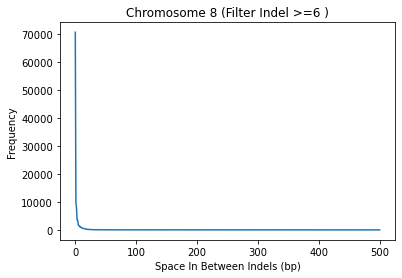

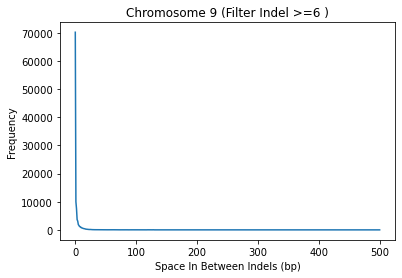

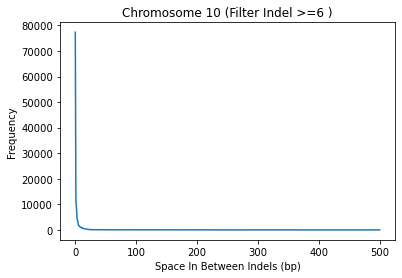

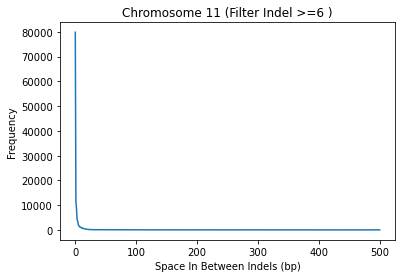

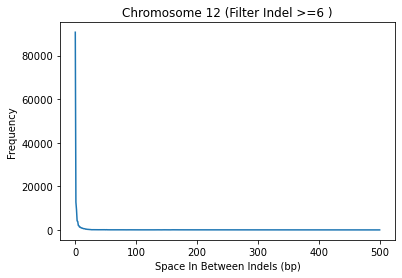

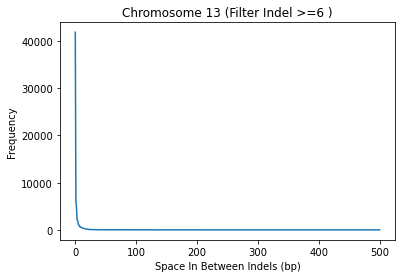

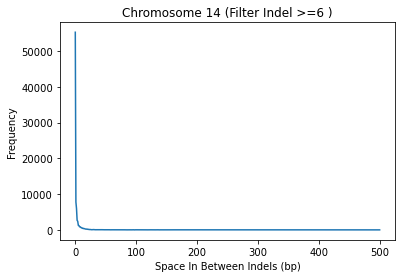

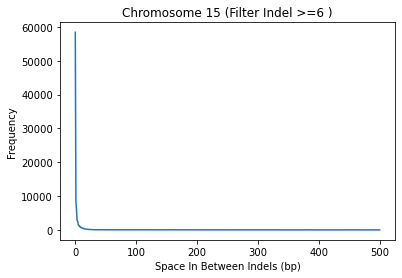

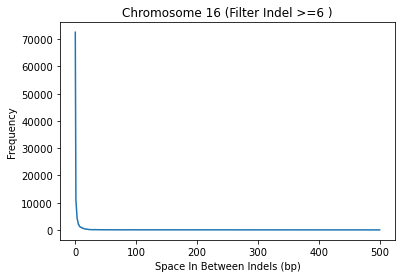

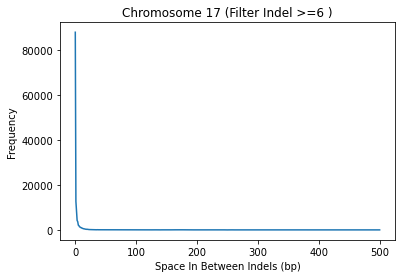

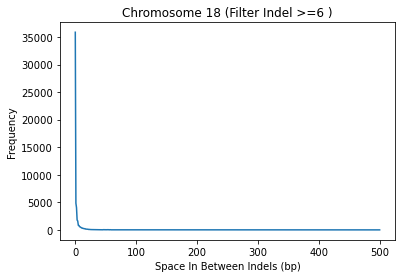

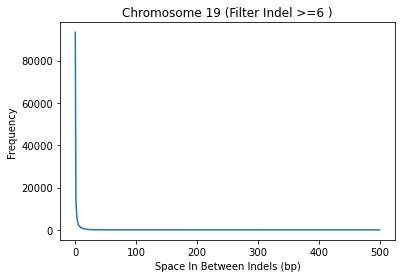

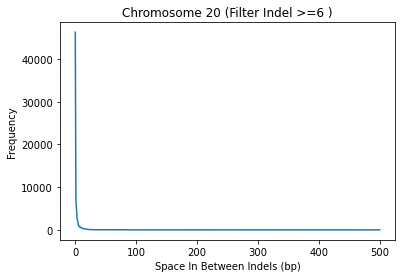

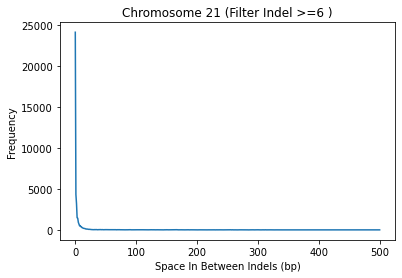

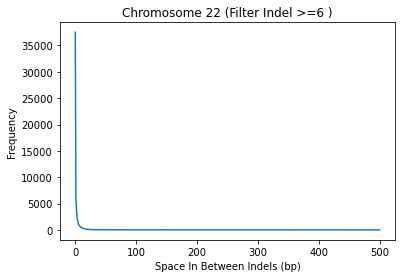

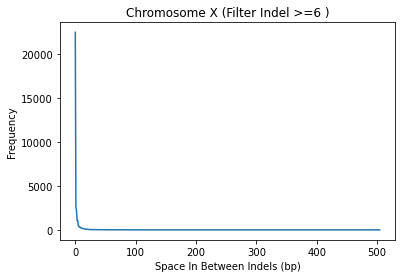

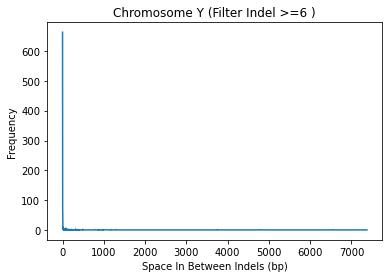

In [389]:
for i in range(0,len(Chromosomes6)):
    vals = list(PosCount6.values())
    n_items = take(501, vals[i].items())
    x, y = zip(*n_items) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    plt.title('Chromosome %s (Filter Indel >=6 )'%(Chromosomes[i]))
    plt.xlabel('Space In Between Indels (bp)')
    plt.ylabel('Frequency')
    plt.savefig("5 Filter Chromosome{C}.png".format(C=Chromosomes[i]))
    plt.show()
    